In [1]:
import sys
sys.path.append('../')

In [2]:
from deepracer.tracks import TrackIO, Track

from deepracer.logs import \
    AnalysisUtils as au, \
    SimulationLogsIO as slio, \
    EvaluationUtils as eu, \
    PlottingUtils as pu,\
    NewRewardUtils as nr \

Loaded 71 waypoints


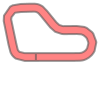

In [3]:
tu = TrackIO(base_path='../tracks')
track: Track = tu.load_track("reinvent_base")

track.road_poly

In [4]:
fname = '../logs/training-simulation-logs-w7.log'
df = slio.load_pandas(fname)
df = df.rename(columns={'track_len':'track_length'}) 
df['track_width'] = 0.76
df.head()

,iteration,episode,steps,x,y,yaw,steer,throttle,action,reward,done,on_track,progress,closest_waypoint,track_length,timestamp,track_width
0,4,79,129,7.4037,1.9633,69.9906,-30.0,0.67,1.0,0.641,0,True,34.0737,20,17.67,1592352449.9135103,0.76
1,4,79,130,7.4208,2.0184,71.6667,-30.0,1.00,2.0,0.801,0,True,34.3328,20,17.67,1592352449.9813867,0.76
2,4,79,131,7.4433,2.0844,71.4586,0.0,1.00,5.0,0.001,0,False,34.6393,20,17.67,1592352450.0457623,0.76
3,4,79,132,7.4636,2.1396,70.8800,0.0,1.00,5.0,0.001,0,False,34.8930,20,17.67,1592352450.115657,0.76
4,4,79,133,7.4885,2.2083,70.5651,-30.0,0.33,0.0,0.001,0,False,35.2090,21,17.67,1592352450.1809247,0.76


In [5]:
nr.new_reward(df, track.center_line, 'reward') #, verbose=True)

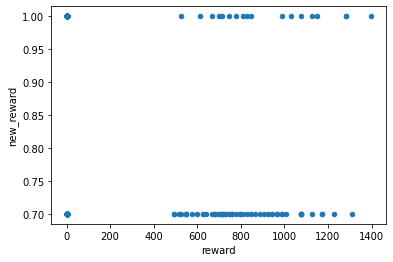

In [6]:
df.plot(x='reward',y='new_reward',kind='scatter')

In [7]:
from reward import AWSReward, RewardFactory
factory = RewardFactory(AWSReward)
factory.print_available_reward_classes()

['RewardZ2', 'RewardZ3', 'RewardZ1', 'RewardZ4', 'RewardZ4_2', 'RewardZ5', 'RewardZ6', 'RewardZ7', 'RewardY1', 'RewardY2', 'RewardX1', 'RewardW7', 'RewardW6', 'RewardW5', 'RewardW4', 'RewardW3', 'RewardW2']


In [8]:
params = nr.df_to_params(next(df.iterrows())[1], track.center_line)
missing_params = {'track_width': 0.76, 'track_length': 17.67}
params.update(missing_params)
w6 = factory.build('RewardW6',params)
float(w6)

0.6410000000000001

In [9]:
# # This util has a very complicated way to get a reward function
# nr.new_reward??
# #this util is missing some parameters and hardcoding others
# nr.df_to_params??

In [12]:
factory.calculate_new_reward(df,track.center_line,nr.df_to_params,reward_name='RewardW6',missing_params=factory.DEFAULT_MISSING_PARAMETERS)

In [13]:
df.head()

,iteration,episode,steps,x,y,yaw,steer,throttle,action,reward,done,on_track,progress,closest_waypoint,track_length,timestamp,track_width,new_reward,RewardW6
0,3,59,158,6.7222,2.9704,115.5839,-30.0,0.67,1.0,0.001,0,False,40.0938,24,17.67,1592262028.0611193,0.76,0.7,0.641
1,3,59,159,6.6905,3.0388,115.2721,30.0,0.33,6.0,0.001,0,False,40.4082,24,17.67,1592262028.1277528,0.76,0.7,0.001
2,3,59,160,6.6707,3.0799,115.5163,30.0,0.33,6.0,0.001,0,False,40.5325,24,17.67,1592262028.198702,0.76,0.7,0.001
3,3,59,161,6.6526,3.1150,115.9148,-30.0,0.67,1.0,0.001,0,False,40.5325,24,17.67,1592262028.2617905,0.76,0.7,0.001
4,3,59,162,6.6298,3.1576,116.5388,30.0,1.00,8.0,0.001,0,False,40.5325,24,17.67,1592262028.3289192,0.76,0.7,0.001


In [10]:
factory.calculate_all_rewards(df,track.center_line,nr.df_to_params, missing_params=factory.DEFAULT_MISSING_PARAMETERS)
df.head()

,iteration,episode,steps,x,y,yaw,steer,throttle,action,reward,...,RewardZ7,RewardY1,RewardY2,RewardX1,RewardW7,RewardW6,RewardW5,RewardW4,RewardW3,RewardW2
0,4,79,129,7.4037,1.9633,69.9906,-30.0,0.67,1.0,0.641,...,0.001,0.001,0.001,1.641,0.641,0.641,0.641,0.641,0.641,0.641
1,4,79,130,7.4208,2.0184,71.6667,-30.0,1.00,2.0,0.801,...,0.001,0.001,0.001,1.801,0.801,0.801,0.801,0.801,0.801,0.801
2,4,79,131,7.4433,2.0844,71.4586,0.0,1.00,5.0,0.001,...,0.001,0.001,0.001,2.001,1.001,1.001,1.001,1.001,1.001,1.001
3,4,79,132,7.4636,2.1396,70.8800,0.0,1.00,5.0,0.001,...,0.001,0.001,0.001,2.001,1.001,1.001,1.001,1.001,1.001,1.001
4,4,79,133,7.4885,2.2083,70.5651,-30.0,0.33,0.0,0.001,...,0.001,0.001,0.001,1.641,0.641,0.641,0.641,0.641,0.641,0.641
